# Visualization of the Tip Prediction Model

In [1]:
# debug line to make sure we are working with the right python interpreter
import sys
print(sys.executable)

/Users/cirogreco/PycharmProjects/alpha/examples/03-ml-workflow/venv/bin/python3.11


## Load the prediction table from your active branch

In [2]:
import bauplan

In [5]:
# instantiate the sdk client
client = bauplan.Client()

# query takes an SQL query and an active branch. Remember to pass the right branch.
# define the branch and the sql query
active_branch = "ciro.tip_prediction_model" # 👈👈 Put your active branch in here!! 
sql_query = "SELECT * FROM tip_predictions"

# run the query, get in return an arrow table and convert it into a Pandas DataFrame
df = client.query(sql_query, branch_name=active_branch).to_pandas()
df.head()

,log_trip_miles,base_passenger_fare,trip_time,tips,predictions
0,0.810808,0.011225,0.425776,5.39,6.136577
1,-1.182933,-0.738170,-0.714662,2.00,2.685825
2,-1.243576,-0.782071,-0.855889,1.00,2.490345
3,0.020809,-0.250640,-0.078608,6.02,4.920216
4,-0.691749,-0.292230,-0.364248,5.79,4.659584


## Actual vs. Predicted Values Plot 
This scatter plot shows how well the predicted values match the actual values. Ideally, the points should lie on the line y = x.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

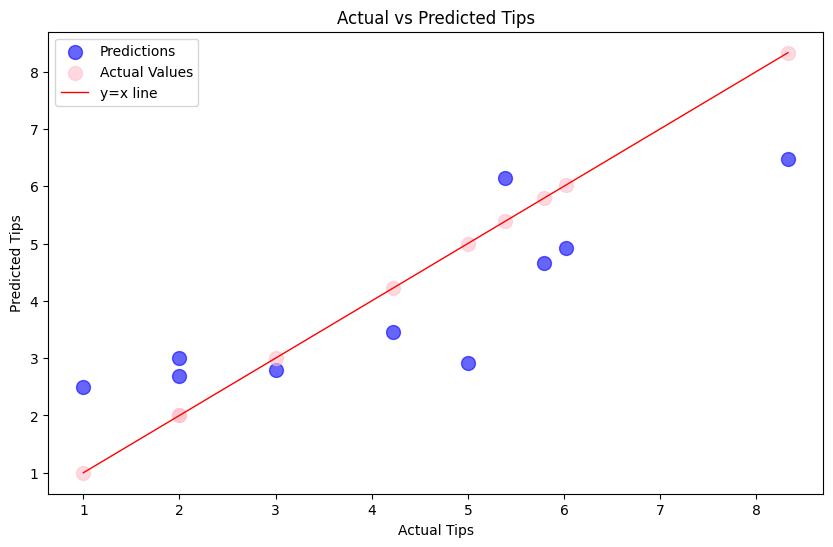

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['tips'], df['predictions'], alpha=0.6, c='blue', label='Predictions', s=100)
plt.scatter(df['tips'], df['tips'], alpha=0.6, c='pink', label='Actual Values', s=100)
plt.plot([min(df['tips']), max(df['tips'])], [min(df['tips']), max(df['tips'])], color='red', linewidth=1, label='y=x line')
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Actual vs Predicted Tips')
plt.legend()
plt.show()

## Residual Plot
This plot shows the residuals (differences between actual and predicted values) against the predicted values. Ideally, the residuals should be randomly distributed around zero, indicating that the model captures the data's patterns.


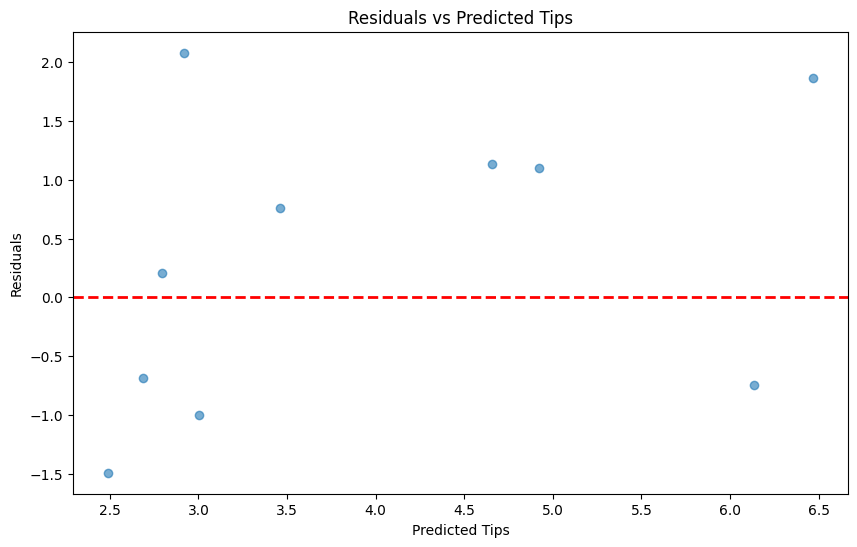

In [8]:
residuals = df['tips'] - df['predictions']
plt.figure(figsize=(10, 6))
plt.scatter(df['predictions'], residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Tips')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Tips')
plt.show()

## Distribution of Residuals
Distribution of Residuals: This histogram shows the distribution of the residuals. Ideally, the residuals should be normally distributed around zero.


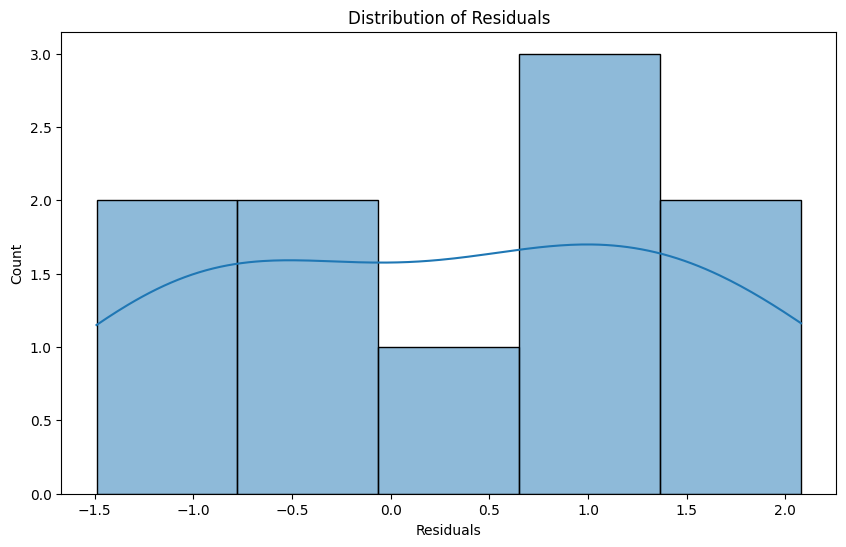

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()